# Cauchy problem

## $\frac{dx}{dt}=-x, x(0)=1,0<\text{t}<3$

In [28]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100

f = lambda t, x: -x
a = 0
b = 3
n = 2000
t = np.linspace(0, 3, n)
u = np.zeros(n)
u0 = 1
u[a] = u0
exact_solution = lambda t: np.exp(-t)

## Euler method

In [29]:
def euler_method(u, t, f):
	for i in range(t.size - 1):
		h = t[i + 1] - t[i]
		u[i + 1] = u[i] + h * f(t[i], u[i])
	return u

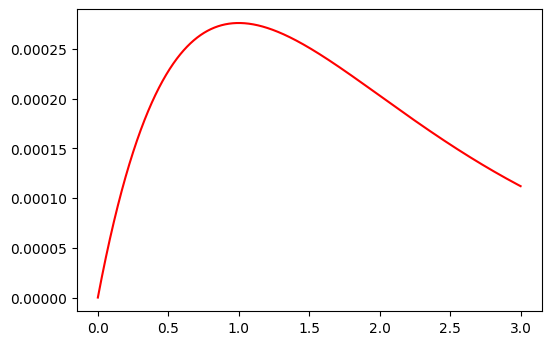

In [30]:
plt.plot(t, np.abs(euler_method(u, t, f) - np.vectorize(exact_solution)(t)), 'r')
plt.show()

## Runge-Kutt 2nd order of precision method

In [31]:
def runge_kutt2(u, t, f):
	a = 3 / 4
	for i in range(t.size - 1):
		h = t[i + 1] - t[i]
		u[i + 1] = u[i] + h * ((1 - a) * f(t[i], u[i]) + a * f(t[i] + h / (2 * a), u[i] + h / (2 * a) * f(t[i], u[i])))
	return u

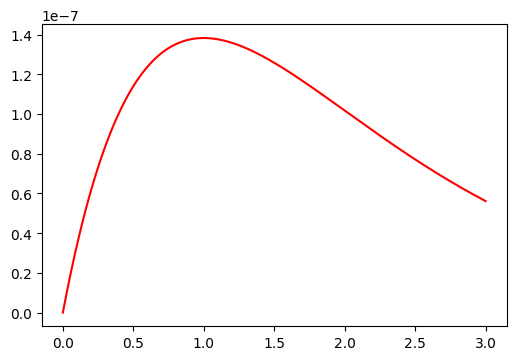

In [32]:
plt.plot(t, np.abs(runge_kutt2(u, t, f) - np.vectorize(exact_solution)(t)), 'r')
plt.show()

## Runge-Kutt 4th order of precision method


In [33]:
def runge_kutt4(u, t, f):
	for i in range(t.size - 1):
		h = t[i + 1] - t[i]
		k1 = f(t[i], u[i])
		k2 = f(t[i] + h / 2, u[i] + h / 2 * k1)
		k3 = f(t[i] + h / 2, u[i] + h / 2 * k2)
		k4 = f(t[i] + h, u[i] + h * k3)
		u[i + 1] = u[i] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
	return u

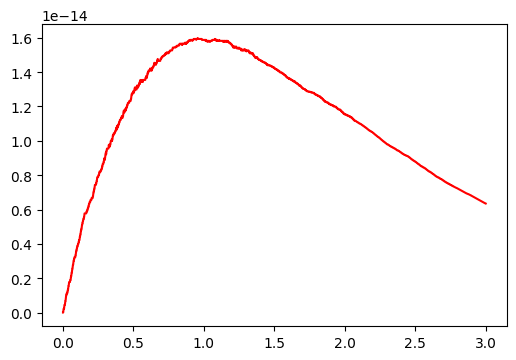

In [34]:
plt.plot(t, np.abs(runge_kutt4(u, t, f) - np.vectorize(exact_solution)(t)), 'r')
plt.show()